**This notebook contains some use cases and examples of solving linear algebra problems with python numpy**

In [1]:
# Let's import the required libraries

import numpy as np
import matplotlib.pyplot as plt

**For our use case, let's start off with a simple linear equation:**

-x1 + 3x2 = 7

3x1 + 2x2 = 1

In [2]:
# Create two arrays

a_two_d_arr = np.array([[-1,3],[3,2]],dtype=float)
a_one_d_arr = np.array([7,1],dtype=float)

print(f"2D array is: {a_two_d_arr}")
print(f"1D array is: {a_one_d_arr}")

print(f"2D array shape is: {a_two_d_arr.shape}")
print(f"1D array shape is: {a_one_d_arr.shape}")

2D array is: [[-1.  3.]
 [ 3.  2.]]
1D array is: [7. 1.]
2D array shape is: (2, 2)
1D array shape is: (2,)


In [3]:
# now lets use the linear algebra solve function to solve the vectors representing our equation to get the output(finite/infinie)

lin_alg_sol = np.linalg.solve(a_two_d_arr, a_one_d_arr)
print(f"Linear algebra solution is: {lin_alg_sol}")

Linear algebra solution is: [-1.  2.]


In [4]:
# now let's use the linear algebra det (determinant) function to find the determinant

lin_alg_det = np.linalg.det(a_two_d_arr)
print(f"The determinant of the equation is: {lin_alg_det:.2f}")

The determinant of the equation is: -11.00


**Another way to find the solution to an equation is to eliminate the variables, let's look at example below**

-x1 + 3x2 = 7

3x1 + 2x2 = 1

For the above equation, if we multiply 3 in the first equation and add it to the second equation then we get the following equation

11x2 = 22 

Hence, we can conclude that x2 is 2. Similar way if we now take x2 and replace its value in original equation 1

-1x1 + 6 = 7, and x1 is -1

In [5]:
# now let's try to derive this using the numpy

# let's stack the arrays together horizontally and reshape the one d array to vertical two d array

lin_alg_eq_arr = np.hstack((a_two_d_arr, np.reshape(a_one_d_arr,(2,1))))

print(f"Linear algebra equation array is: {lin_alg_eq_arr}")

# let's extract one row of the metric 

print(f"One row of the metric is: {lin_alg_eq_arr[0]}")

Linear algebra equation array is: [[-1.  3.  7.]
 [ 3.  2.  1.]]
One row of the metric is: [-1.  3.  7.]


In [6]:
# now let's try the elimination method on the new matrice

# start by creating a copy of the original array
cpy_lin_alg_eq_arr = lin_alg_eq_arr.copy()

# multiply first row with 3 and add it to the second row
cpy_lin_alg_eq_arr_comp = cpy_lin_alg_eq_arr[0]*3+cpy_lin_alg_eq_arr[1]

print(f"Print the new computed array: {cpy_lin_alg_eq_arr_comp}")

# multiple computed row with 1/11
cpy_lin_alg_eq_arr_comp = 1/11 * cpy_lin_alg_eq_arr_comp
print(f"Print the new computed array: {cpy_lin_alg_eq_arr_comp}") # now you get x2 as 2

Print the new computed array: [ 0. 11. 22.]
Print the new computed array: [0. 1. 2.]


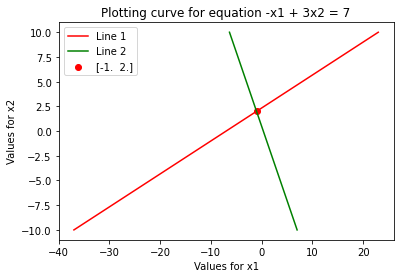

In [7]:
# now let's look at few more examples and plot them
x_2_arr = np.linspace(-10,10,100)

# now let's assume we are substituting the values above for x2 and let's derive values for x1
x_1_arr_line_1 = (lin_alg_eq_arr[0,2] - lin_alg_eq_arr[0,1] * x_2_arr)/(lin_alg_eq_arr[0,0])
x_1_arr_line_2 = (lin_alg_eq_arr[1,2] - lin_alg_eq_arr[1,1] * x_2_arr)/(lin_alg_eq_arr[1,0])

# Plot the data
plt.plot(x_1_arr_line_1, x_2_arr, marker='', color='r', label='Line 1')
plt.plot(x_1_arr_line_2, x_2_arr, marker='', color='g', label='Line 2')

# Set labels and title
plt.xlabel("Values for x1")
plt.ylabel("Values for x2")
plt.title("Plotting curve for equation -x1 + 3x2 = 7")

plt.scatter(lin_alg_sol[0], lin_alg_sol[1], marker='o', color='r', label=f'{lin_alg_sol}')

plt.legend()

plt.show()

Determinant is: 0.0
Error while solving linear equation: Singular matrix
Equation array is: [[-1  3  7]
 [ 3 -9  1]]


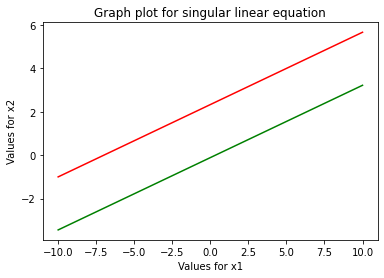

In [2]:
# now let's compute system of linear equation with no solution
# −𝑥1+3𝑥2=7
# 3𝑥1−9𝑥2=1

eq_attr_arr = np.array([[-1,3],[3,-9]])
eq_val_arr = np.array([7,1])

# calculate the determinant
det = np.linalg.det(eq_attr_arr)

print(f"Determinant is: {det}")

# solve the linear equation
try:
    sol = np.linalg.solve(eq_attr_arr, eq_val_arr)
    print(f"Solution of the linear equation is: {sol}")
except np.linalg.LinAlgError as err:
    print(f"Error while solving linear equation: {err}")

eq_arr = np.hstack((eq_attr_arr,eq_val_arr.reshape(2,1)))

print(f"Equation array is: {eq_arr}")

# let's try the elimination approach
x1_val_arr = np.linspace(-10,10,100)

# let's create two lines when values for x1 are given
x2_arr_line_1 = (eq_arr[0,2] - eq_arr[0,0] * x1_val_arr)/eq_arr[0,1]
x2_arr_line_2 = (eq_arr[1,2] - eq_arr[1,0] * x1_val_arr)/eq_arr[1,1]

plt.plot(x1_val_arr, x2_arr_line_1, marker='', color='r')
plt.plot(x1_val_arr, x2_arr_line_2, marker='', color='g')
plt.title("Graph plot for singular linear equation")
plt.xlabel("Values for x1")
plt.ylabel("Values for x2")
plt.show()

Determinant is: 0.0
Error while solving linear equation: Singular matrix
Equation array is: [[ -1   3   7]
 [  3  -9 -21]]


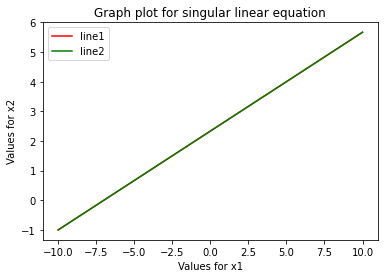

In [5]:
# now let's compute system of linear equation with infinite solutions
# −𝑥1+3𝑥2=7
# 3𝑥1−9𝑥2=1

eq_attr_arr = np.array([[-1,3],[3,-9]])
eq_val_arr = np.array([7,-21])

# calculate the determinant
det = np.linalg.det(eq_attr_arr)

print(f"Determinant is: {det}")

# solve the linear equation
try:
    sol = np.linalg.solve(eq_attr_arr, eq_val_arr)
    print(f"Solution of the linear equation is: {sol}")
except np.linalg.LinAlgError as err:
    print(f"Error while solving linear equation: {err}")

eq_arr = np.hstack((eq_attr_arr,eq_val_arr.reshape(2,1)))

print(f"Equation array is: {eq_arr}")

# let's try the elimination approach
x1_val_arr = np.linspace(-10,10,100)

# let's create two lines when values for x1 are given
x2_arr_line_1 = (eq_arr[0,2] - eq_arr[0,0] * x1_val_arr)/eq_arr[0,1]
x2_arr_line_2 = (eq_arr[1,2] - eq_arr[1,0] * x1_val_arr)/eq_arr[1,1]

plt.plot(x1_val_arr, x2_arr_line_1, marker='', color='r', label='line1')
plt.plot(x1_val_arr, x2_arr_line_2, marker='', color='g', label='line2')
plt.title("Graph plot for singular linear equation")
plt.xlabel("Values for x1")
plt.ylabel("Values for x2")
plt.legend()
plt.show()